In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

import seaborn as sns
sns.set()

In [2]:
# Définition de la fonction de distribution des probabilités (PDF en anglais). On utilise une distribution normale 2D.

mean = [2., 2.]
cov = [(1, .7), (.7, 1)]

# Génère N points aléatoires
n = 100
X = np.random.multivariate_normal(mean, cov, n)

# Afin d'éviter des problèmes d'affichage, on élimine les données dépassant la zone d'intérêt de la figure suivante
x_min, x_max, y_min, y_max = 0., 4., 0., 4.

X = X[(X[:,0]>x_min) & (X[:,0]<x_max) & (X[:,1]>y_min) & (X[:,1]<y_max)]


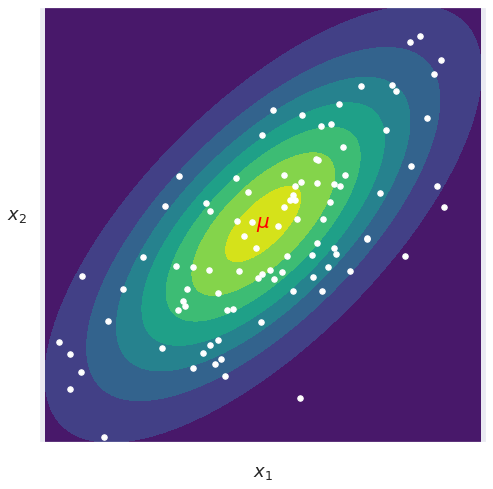

In [3]:
# Affichage de la PDF

# La PDF est calculée sur un grillage (x,y) à l'intérieur de la zone d'intérêt
h = 0.01
x, y = np.mgrid[x_min:x_max:h, y_min:y_max:h]
pos = np.dstack((x, y))
rv = multivariate_normal(mean,cov)


fig = plt.figure(figsize = (8,8))
cm = plt.get_cmap('viridis')

ax = fig.add_subplot(111)
ax.contourf(x, y, rv.pdf(pos),cmap=cm)

ax.scatter(X[:, 0], X[:, 1], c="w", s=30, linewidth=1, marker="o")

# Indique la position de l'origine de la PDF
plt.text(mean[0], mean[1], '$\mu$', horizontalalignment='center', verticalalignment='center', fontsize=20, color='red')

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.axis('equal')

plt.xticks(())
plt.yticks(())
ax.set_xlabel('$x_{1}$',fontsize=18)
ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
ax.yaxis.set_label_coords(-0.05,0.5)
ax.xaxis.set_label_coords(0.5, -0.05)

plt.savefig("Figure_4_41.svg", format="svg")

plt.show()